In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
path = '../parsers/official/data/club_stat.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

,season_id,name,club_name,club_shortName,club_abbr,club_id,teamType,shortName,id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
0,578,Arsenal,Arsenal,Arsenal,ARS,1.0,FIRST,Arsenal,1.0,2556.0,202.0,25.0,55.0,31.0,8.0,4.0,3006.0,47.0,5.0,59.0,31.0,56.0,251.0,5507.0,3.0,9.0,140.0,133.0,125.0,58.0,61.0,32.0,108.0,50.0,94.0,13.0,49.

In [3]:
df['teamType'].unique()

array(['FIRST'], dtype=object)

In [4]:
#Удаляем колонки в которых информация дублируется либо информация бесполезна
df.drop(['name',
         'club_shortName',
         'shortName', 
         'id', 
         'teamType'], axis=1, inplace=True)

In [5]:
df.describe()

,season_id,club_id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,198.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000

In [6]:
df.shape

(200, 219)

In [7]:
id_season = {
        578: 2023,
        489: 2022,
        418: 2021,
        363: 2020,
        274: 2019,
        210: 2018,
        79: 2017,
        54: 2016,
        42: 2015,
        27: 2014,
        22: 2013,
        21: 2012,
        20: 2011,
        19: 2010,
        18: 2009,
        17: 2008,
        16: 2007,
        15: 2006,
        14: 2005,
        13: 2004,
        12: 2003,
        11: 2002,
        10: 2001,
        9: 2000,
        8: 1999,
        7: 1998,
        6: 1997,
        5: 1996,
        4: 1995,
        3: 1994,
        2: 1993,
        1: 1992}

In [8]:
df['season'] = df['season_id'].apply(lambda x: id_season[x])

In [9]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 220 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    season_id                       200 non-null    int64  
 1    club_name                       200 non-null    object 
 2    club_abbr                       200 non-null    object 
 3    club_id                         200 non-null    float64
 4    _accurate_back_zone_pass        200 non-null    float64
 5    _accurate_chipped_pass          200 non-null    float64
 6    _accurate_corners_intobox       200 non-null    float64
 7    _accurate_cross                 200 non-null    float64
 8    _accurate_cross_nocorner        200 non-null    float64
 9    _accurate_flick_on              200 non-null    float64
 10   _accurate_freekick_cross        200 non-null    float64
 11   _accurate_fwd_zone_pass         200 non-null    float64
 12   _accurate_goal_kicks

In [10]:
df['club_name'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Queens Park Rangers', 'Sheffield United',
       'Southampton', 'Stoke City', 'Sunderland', 'Swansea City',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [11]:
columns = list(df.columns)

In [12]:
columns

['season_id',
 'club_name',
 'club_abbr',
 'club_id',
 '_accurate_back_zone_pass',
 '_accurate_chipped_pass',
 '_accurate_corners_intobox',
 '_accurate_cross',
 '_accurate_cross_nocorner',
 '_accurate_flick_on',
 '_accurate_freekick_cross',
 '_accurate_fwd_zone_pass',
 '_accurate_goal_kicks',
 '_accurate_keeper_sweeper',
 '_accurate_keeper_throws',
 '_accurate_launches',
 '_accurate_layoffs',
 '_accurate_long_balls',
 '_accurate_pass',
 '_accurate_pull_back',
 '_accurate_through_ball',
 '_accurate_throws',
 '_aerial_lost',
 '_aerial_won',
 '_attempted_tackle_foul',
 '_attempts_conceded_ibox',
 '_attempts_conceded_obox',
 '_attempts_ibox',
 '_attempts_obox',
 '_att_assist_openplay',
 '_att_assist_setplay',
 '_att_bx_centre',
 '_att_bx_left',
 '_att_bx_right',
 '_att_cmiss_high',
 '_att_cmiss_left',
 '_att_cmiss_right',
 '_att_corner',
 '_att_fastbreak',
 '_att_goal_high_centre',
 '_att_goal_high_left',
 '_att_goal_high_right',
 '_att_goal_low_centre',
 '_att_goal_low_left',
 '_att_goal_

In [13]:
col_eda = [
        'season',
        'club_name',
        '_accurate_pass',
        '_accurate_goal_kicks',
        '_accurate_cross',
        '_aerial_lost',
        '_aerial_won',
        '_total_long_balls',
        '_total_offside',
        '_total_pass',
        '_total_cross',
        '_duel_lost',
        '_duel_won',
        '_saves',
        '_wins',
        '_draws',
        '_won_contest',
        '_won_corners',
        '_won_tackle',
        '_total_yel_card',
        '_keeper_throws',
        '_fwd_pass',
        '_goals',
        '_goals_conceded',
        '_goals_conceded_ibox',
        '_goals_openplay',
        '_goal_assist',
        '_goal_assist_intentional',
        '_goal_assist_openplay',
        '_goal_kicks',
        '_good_high_claim',
        '_blocked_cross',
        '_blocked_pass',
]

In [14]:
df_new = df[col_eda]

<Axes: >

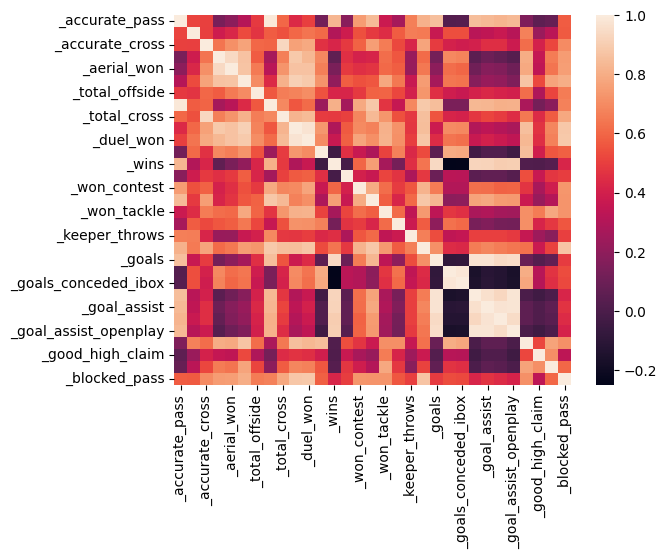

In [15]:
sns.heatmap(df_new.iloc[:, 2:].corr())

Больше всего нам интересны победы и голы, пусть они будут нашими целевыми признаками. Рассмотрим корреляцию других признаков к целевым

In [16]:
df_new.iloc[:, 2:].corr()[['_wins', '_goals']]

,_wins,_goals
_accurate_pass,0.824478,0.856045
_accurate_goal_kicks,0.298133,0.360526
_accurate_cross,0.422072,0.490408
_aerial_lost,0.059196,0.124533
_aerial_won,0.140493,0.194320
_total_long_balls,0.205575,0.265209
_total_offside,0.419447,0.455215
_total_pass,0.806793,0.849701
_total_cross,0.486980,0.552370
_duel_lost,0.289837,0.377125


Теперь возьмем полный датасет и посмотрим какие признаки наиболее зависимы и наименее, фильтровать будем по голам

In [17]:
#Значения нам нужны по модулю
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', key= lambda x: abs(x))[:20]

,_wins,_goals
_attempts_conceded_obox,-0.065459,0.000073
_lost_corners,-0.074921,-0.004487
_pts_dropped_winning_pos,-0.178372,0.007675
_penalty_faced,-0.082481,0.008334
_penalty_conceded,-0.074268,0.011151
_attempts_conceded_ibox,-0.120958,-0.015464
_accurate_flick_on,0.010301,0.020381
_good_high_claim,0.008878,0.027474
_total_high_claim,0.010630,0.028434
_pen_goals_conceded,-0.040668,0.035531


In [18]:
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', ascending=False, key= lambda x: abs(x))[:20]


,_wins,_goals
_goals,0.936730,1.000000
_att_ibox_goal,0.934462,0.990046
_goals_openplay,0.922853,0.974360
_goal_assist,0.917054,0.972018
_goal_assist_openplay,0.903697,0.954186
_big_chance_scored,0.888731,0.948284
_goal_assist_intentional,0.899032,0.941746
_first_half_goals,0.888505,0.941212
_wins,1.000000,0.936730
_ontarget_scoring_att,0.867882,0.929557


Сгруппируем датасет по командам, берем среднее значение т.к. не все команды играли все сезоны

In [19]:
df_group = df_new.iloc[:, 1:].groupby(by='club_name', as_index=False).mean()

In [20]:
df_group.head()

,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,Arsenal,16110.000000,143.600000,140.800000,552.900000,529.400000,1753.300000,70.000000,19128.500000,645.500000,1798.700000,1838.500000,102.200000,19.200000,7.200000,370.100000,210.900000,368.200000,56.600000,185.200000,6165.000000,64.300000,40.500000,35.900000,45.600000,45.900000,36.300000,37.600000,239.200000,30.200000,60.600000,561.900000
1,Aston Villa,10991.714286,161.000000,147.142857,555.571429,566.857143,2029.428571,52.000000,13859.857143,654.285714,1760.857143,1841.142857,102.857143,10.857143,6.571429,307.714286,169.571429,345.571429,65.857143,149.571429,4993.571429,40.428571,51.714286,44.000000,26.571429,29.285714,22.285714,23.000000,265.714286,43.428571,80.142857,478.285714
2,Bournemouth,11097.000000,158.142857,129.571429,610.857143,571.714286,1963.285714,49.857143,14168.714286,574.857143,1863.000000,1774.142857,106.714286,9.714286,7.285714,319.142857,173.428571,337.571429,54.428571,177.571429,5326.857143,41.000000,61.142857,53.857143,25.571429,28.285714,21.857143,20.857143,288.571429,28.857143,83.285714,555.857143
3,Brentford,8362.333333,142.666667,129.333333,512.000000,528.666667,1758.333333,51.666667,11139.333333,495.000000,1449.666667,1480.000000,103.000000,10.666667,8.333333,199.666667,124.333333,264.666667,48.000000,129.000000,4444.000000,41.666667,38.666667,31.000000,24.000000,27.333333,22.000000,20.333333,221.666667,30.333333,45.666667,347.666667
4,Brighton and Hove Albion,12968.142857,163.285714,148.428571,536.285714,574.428571,2027.428571,66.000000,16007.714286,610.714286,1727.857143,1735.000000,93.714286,10.142857,10.857143,287.285714,173.142857,333.571429,53.714286,150.000000,5473.714286,40.857143,47.285714,41.000000,27.428571,27.428571,20.714286,22.142857,254.285714,25.142857,57.428571,520.857143


In [21]:
#Посмотрим на самые успешные команды за последние 10 лет по наибольшему количеству голов
df_group[['club_name', '_goals', '_wins']].sort_values(by='_goals', ascending=False)[:10]

,club_name,_goals,_wins
17,Manchester City,84.100000,24.900000
15,Liverpool,71.200000,21.300000
29,Tottenham Hotspur,64.500000,19.200000
0,Arsenal,64.300000,19.200000
7,Chelsea,60.000000,18.500000
14,Leicester City,57.444444,14.888889
18,Manchester United,56.400000,18.500000
13,Leeds United,50.666667,11.333333
32,West Ham United,48.700000,12.500000
25,Southampton,45.888889,11.777778


<Axes: xlabel='_goals', ylabel='Count'>

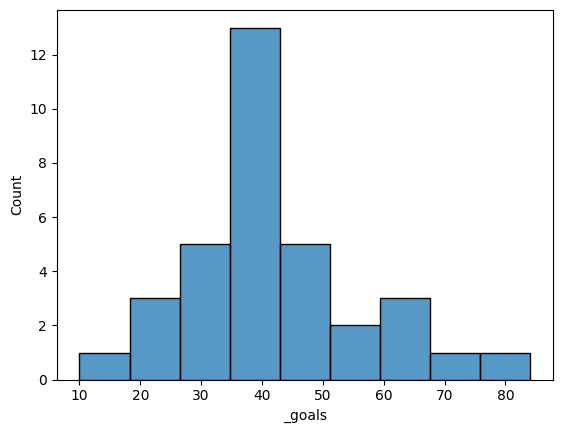

In [22]:
sns.histplot(df_group['_goals'])

<Axes: xlabel='_wins', ylabel='Count'>

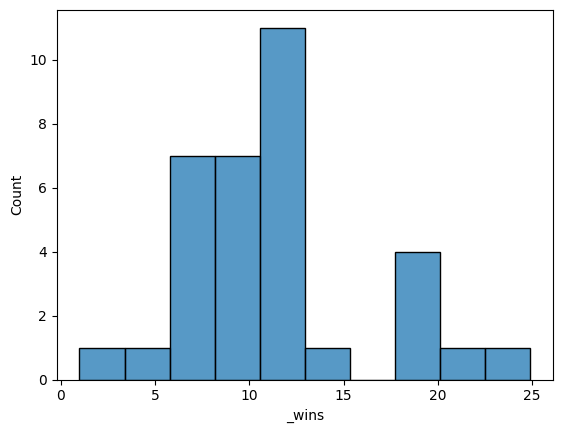

In [23]:
sns.histplot(df_group['_wins'])

<Axes: xlabel='_draws', ylabel='Count'>

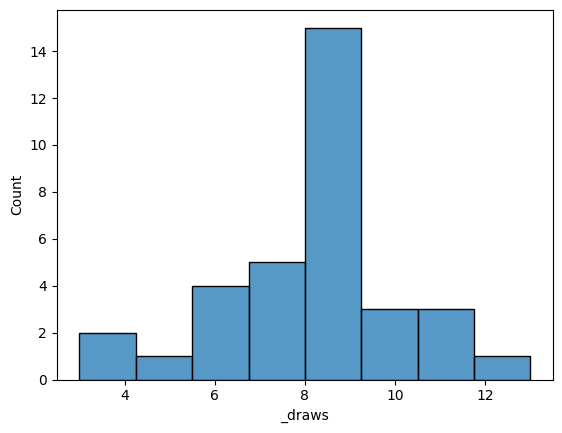

In [24]:
sns.histplot(df_group['_draws'])

In [25]:
df_new.shape

(200, 33)

Рассмотрим совместное распределение признаков между собой 

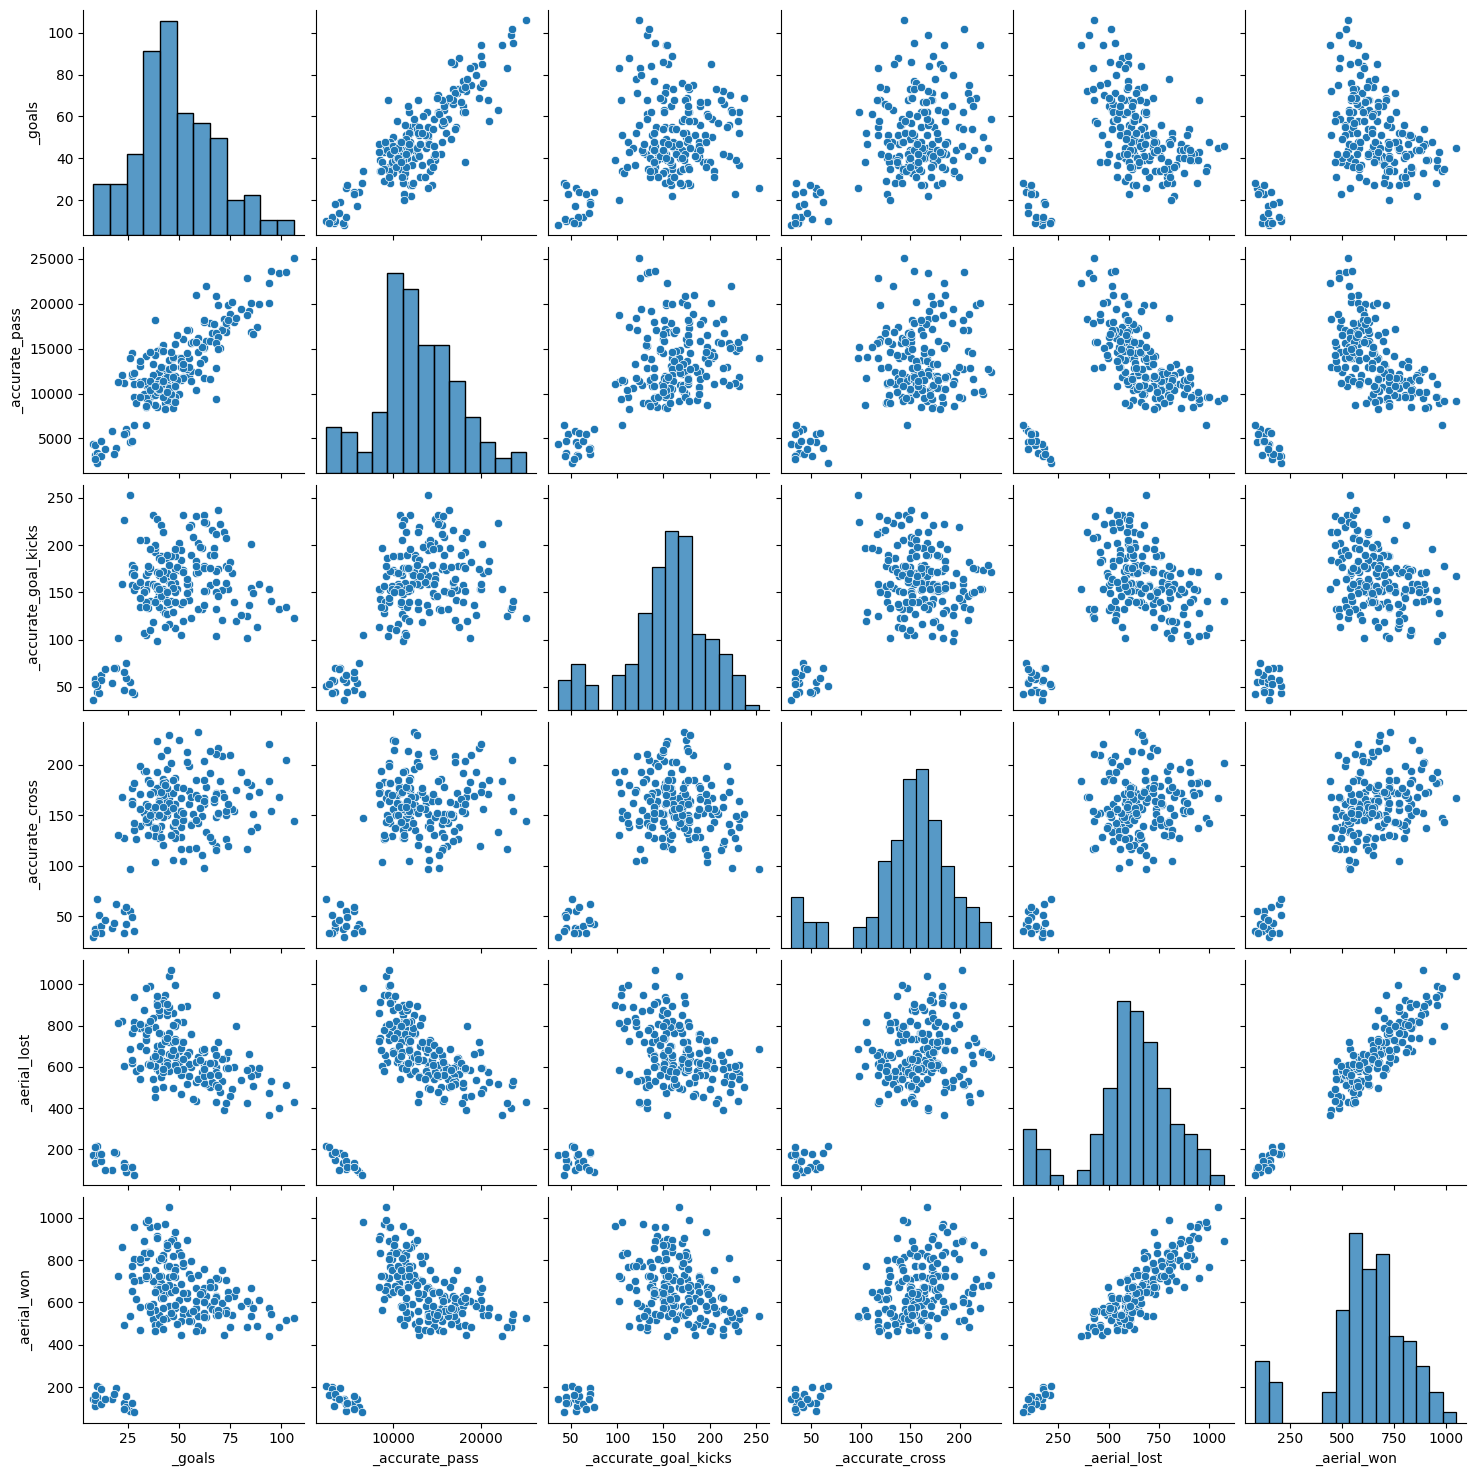

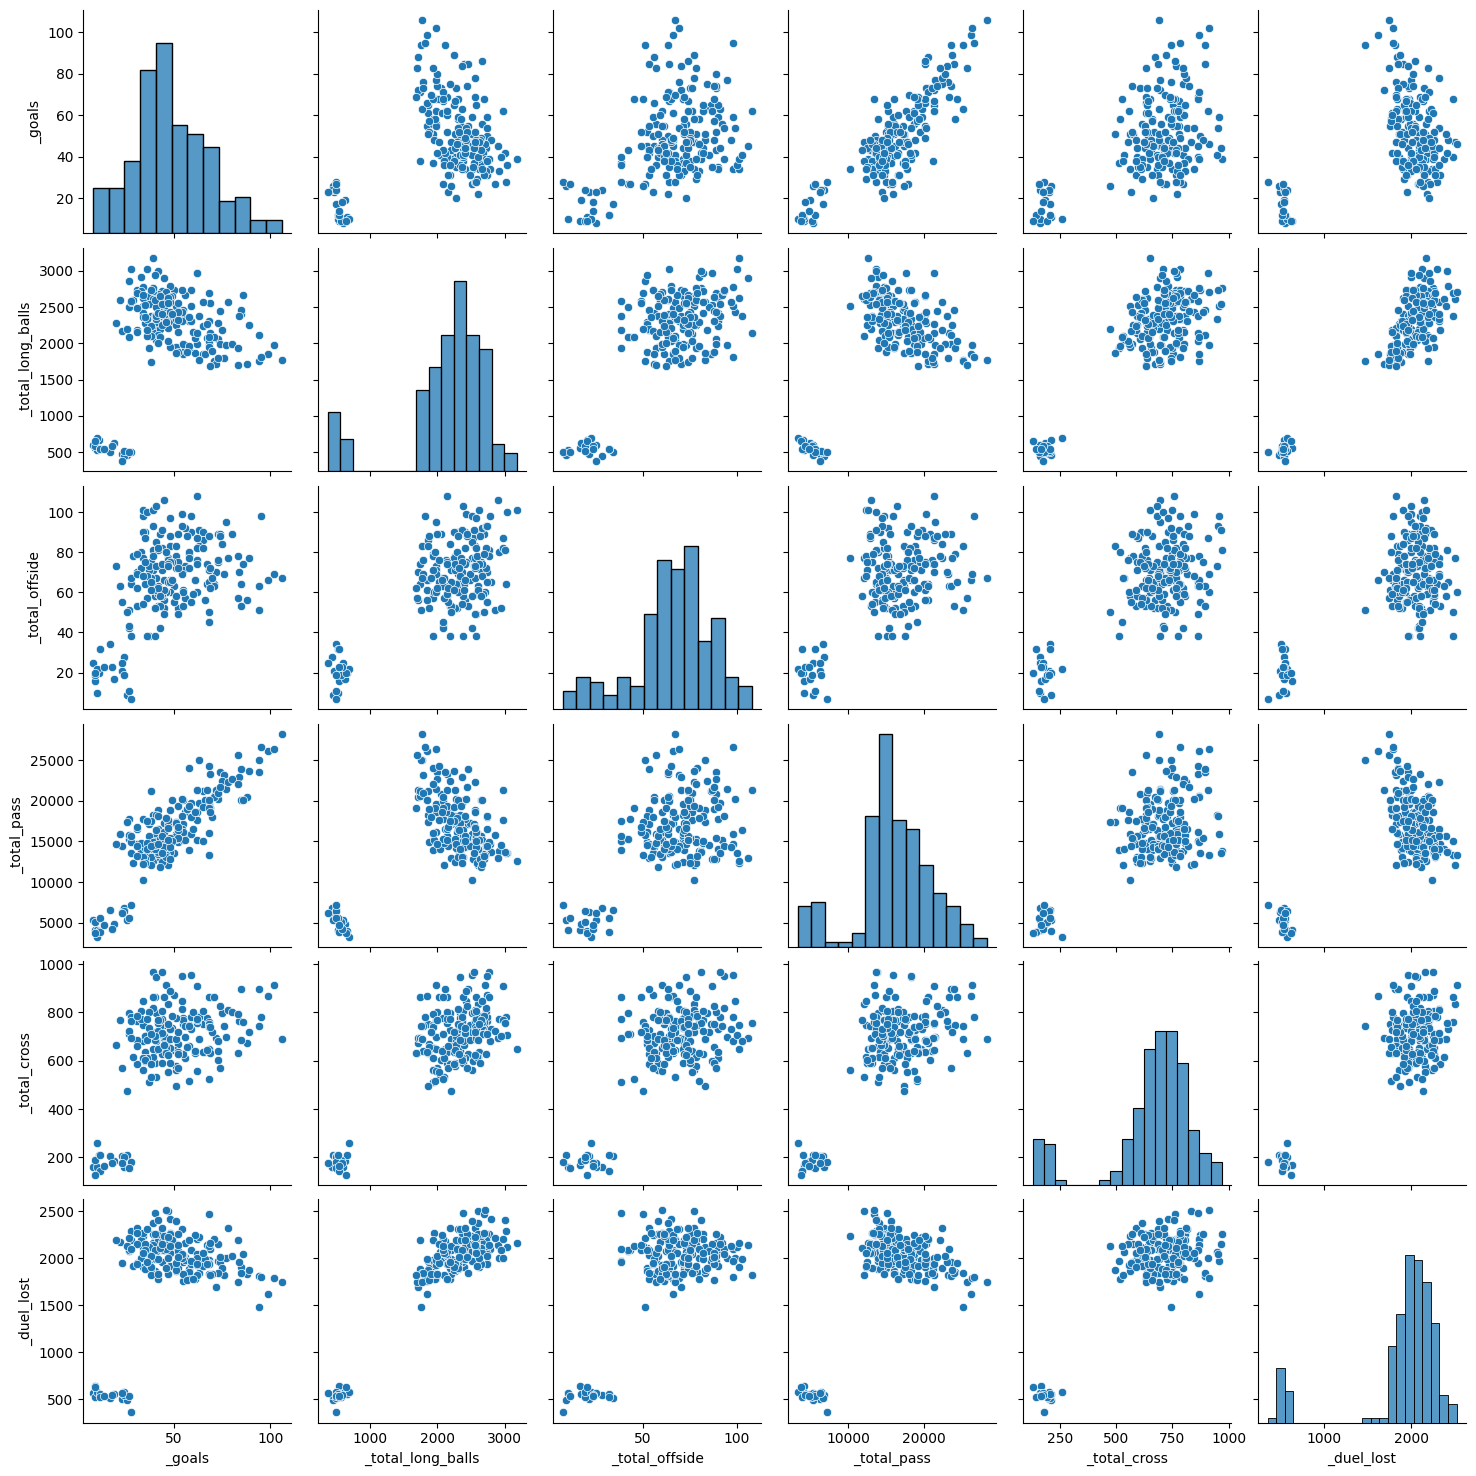

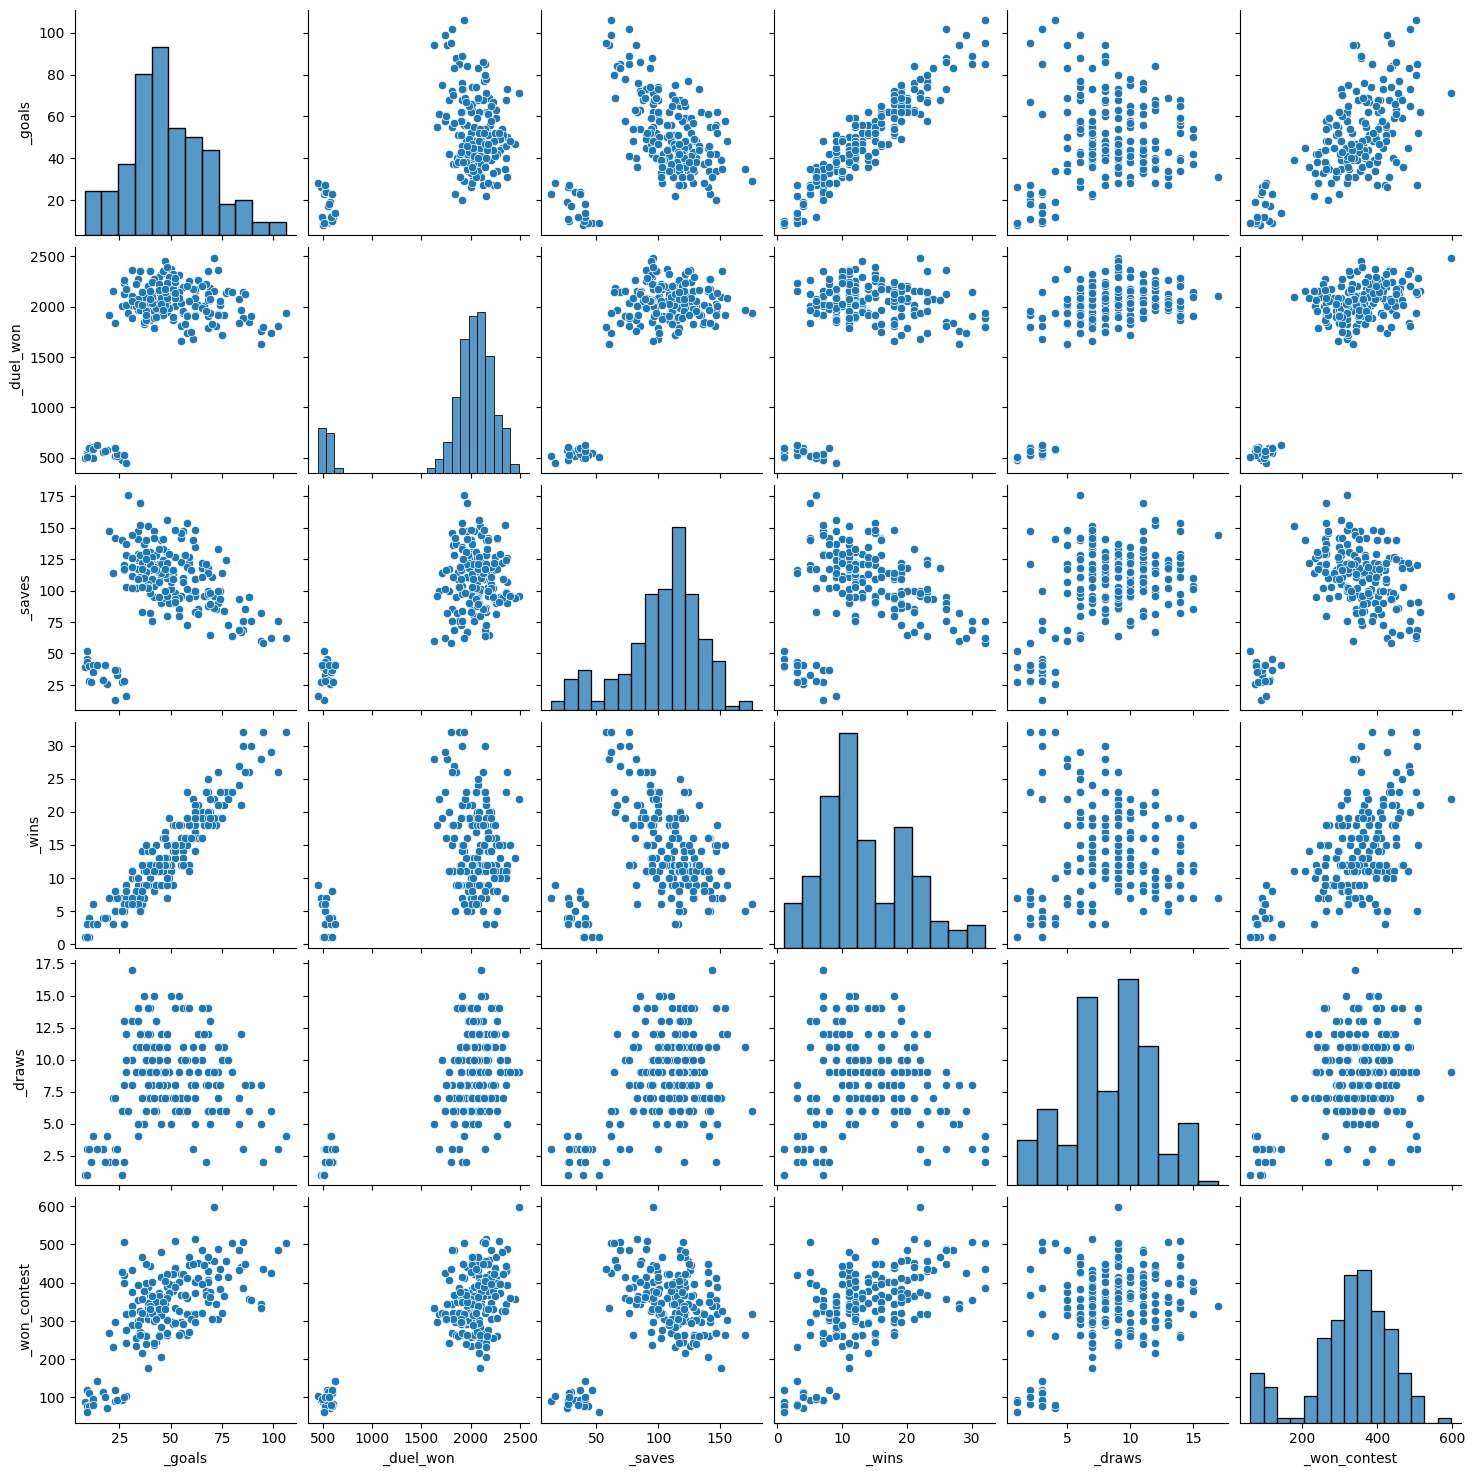

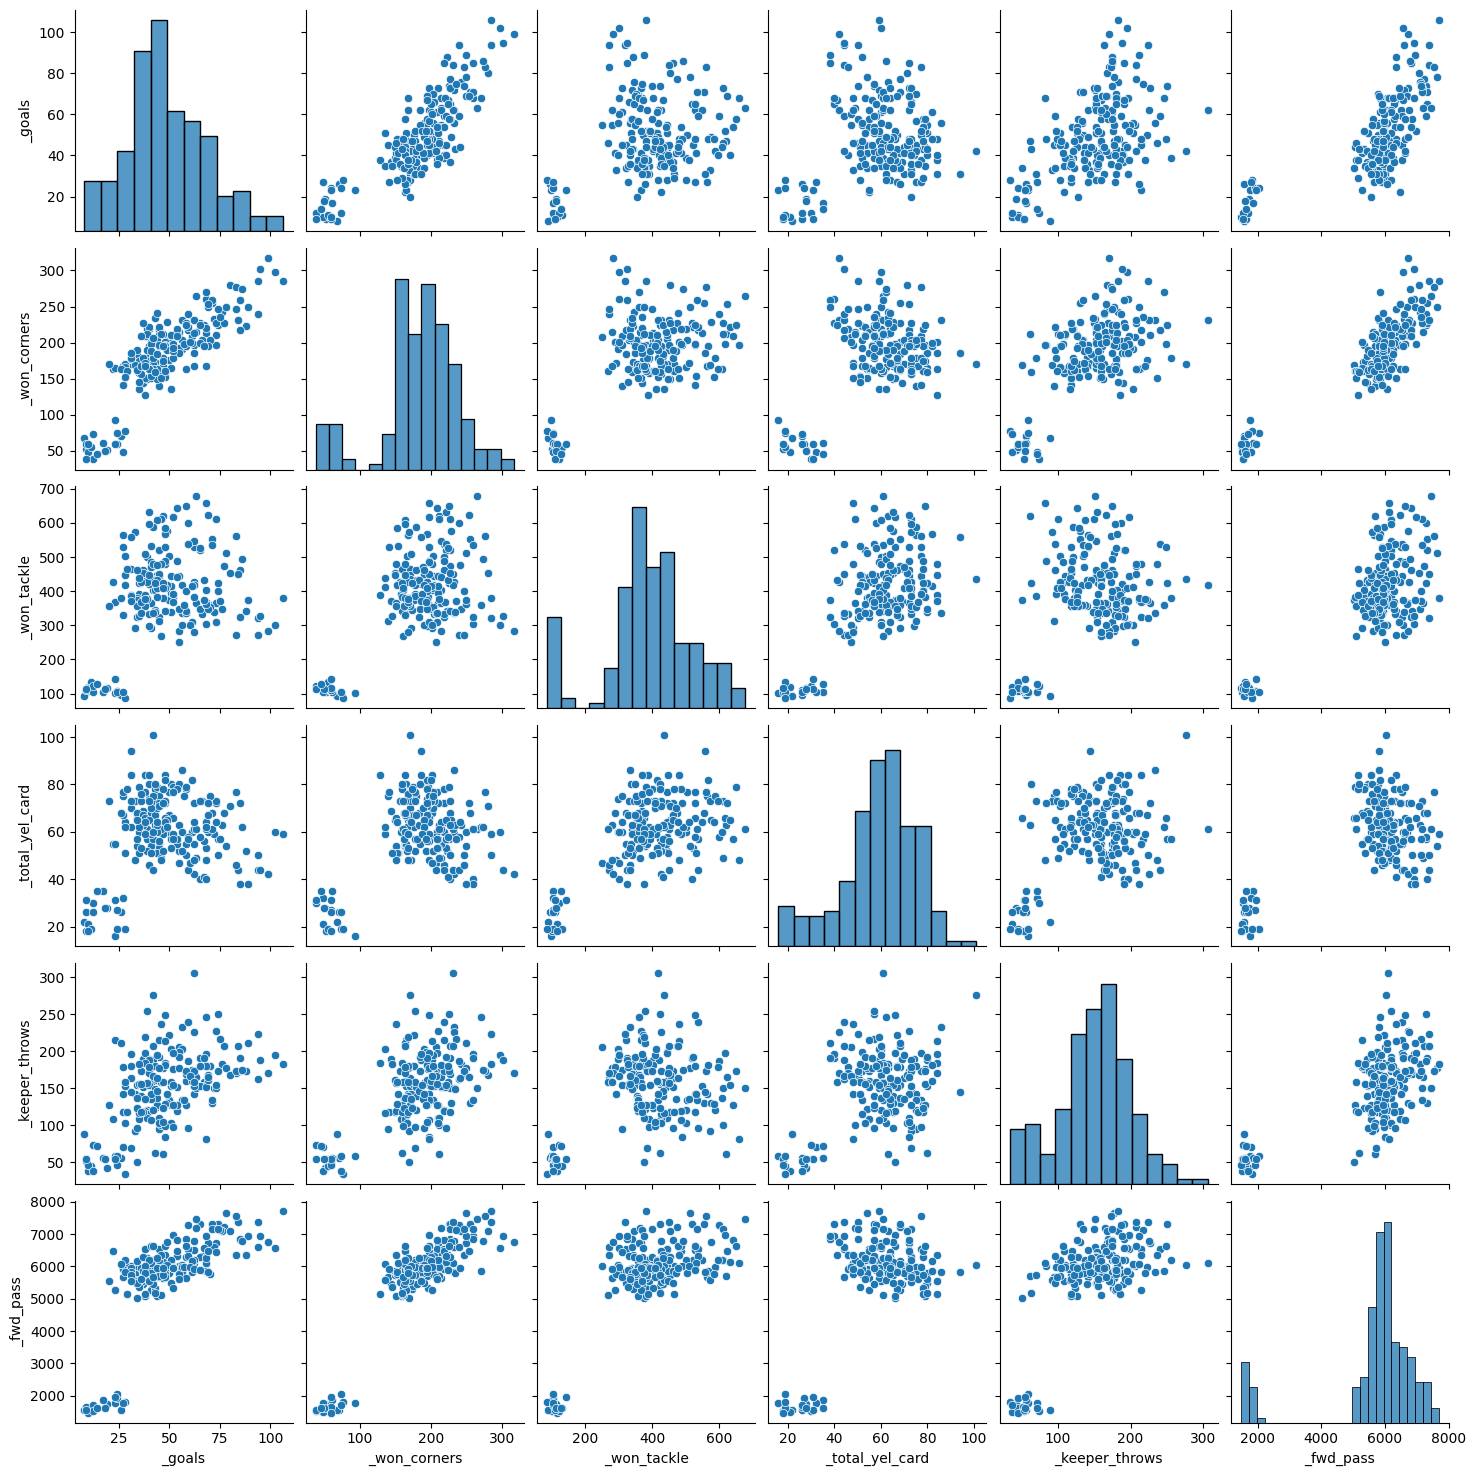

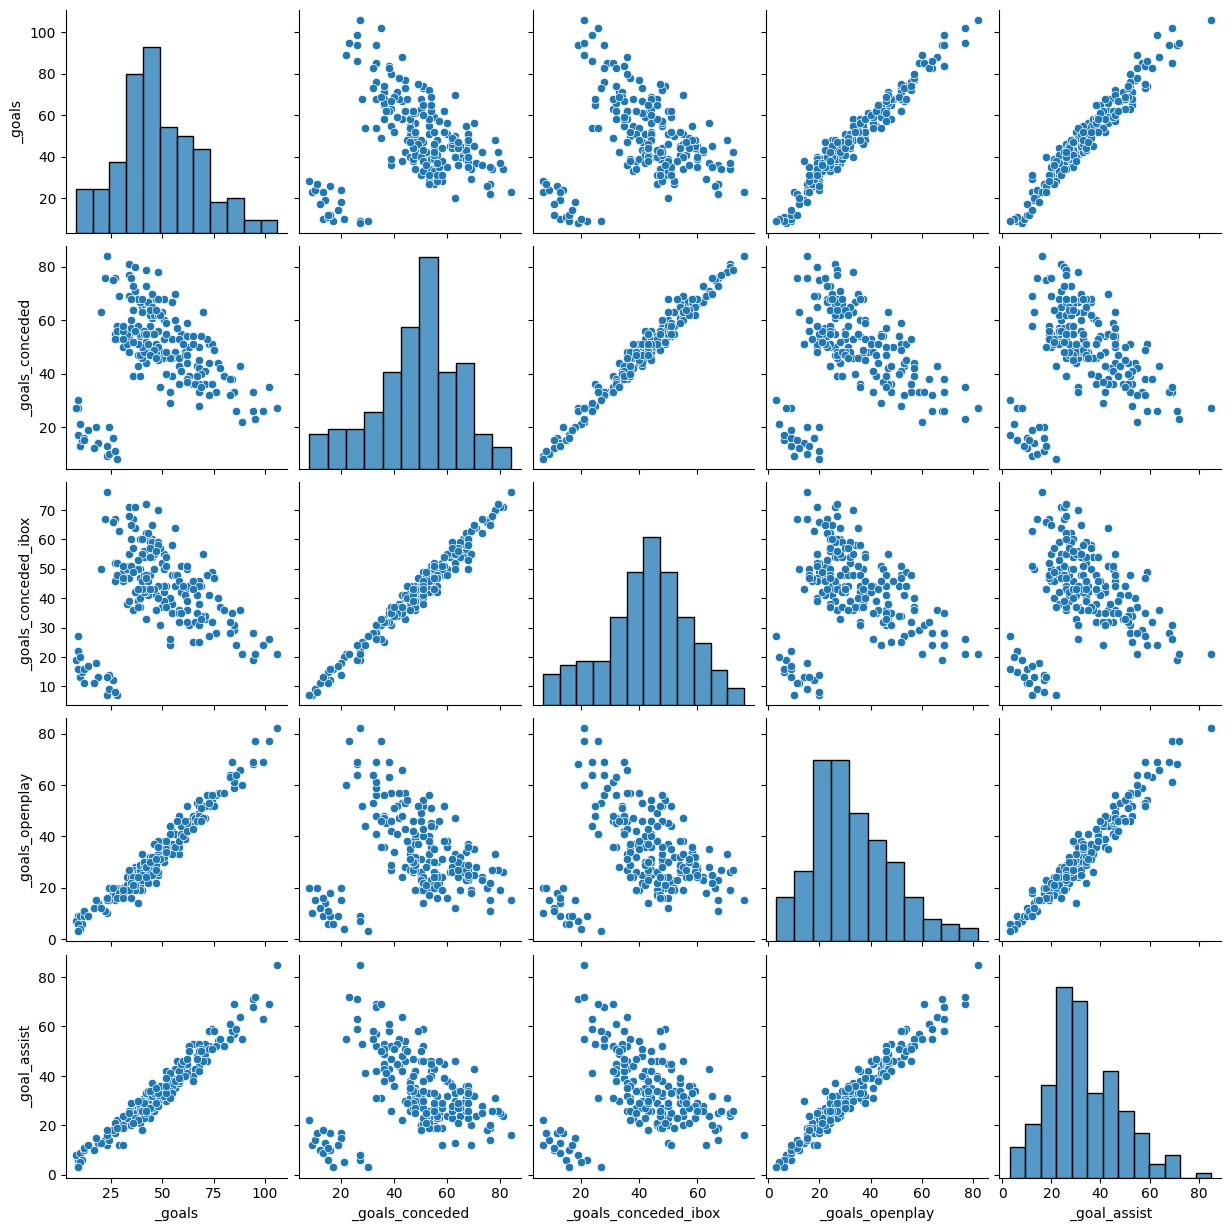

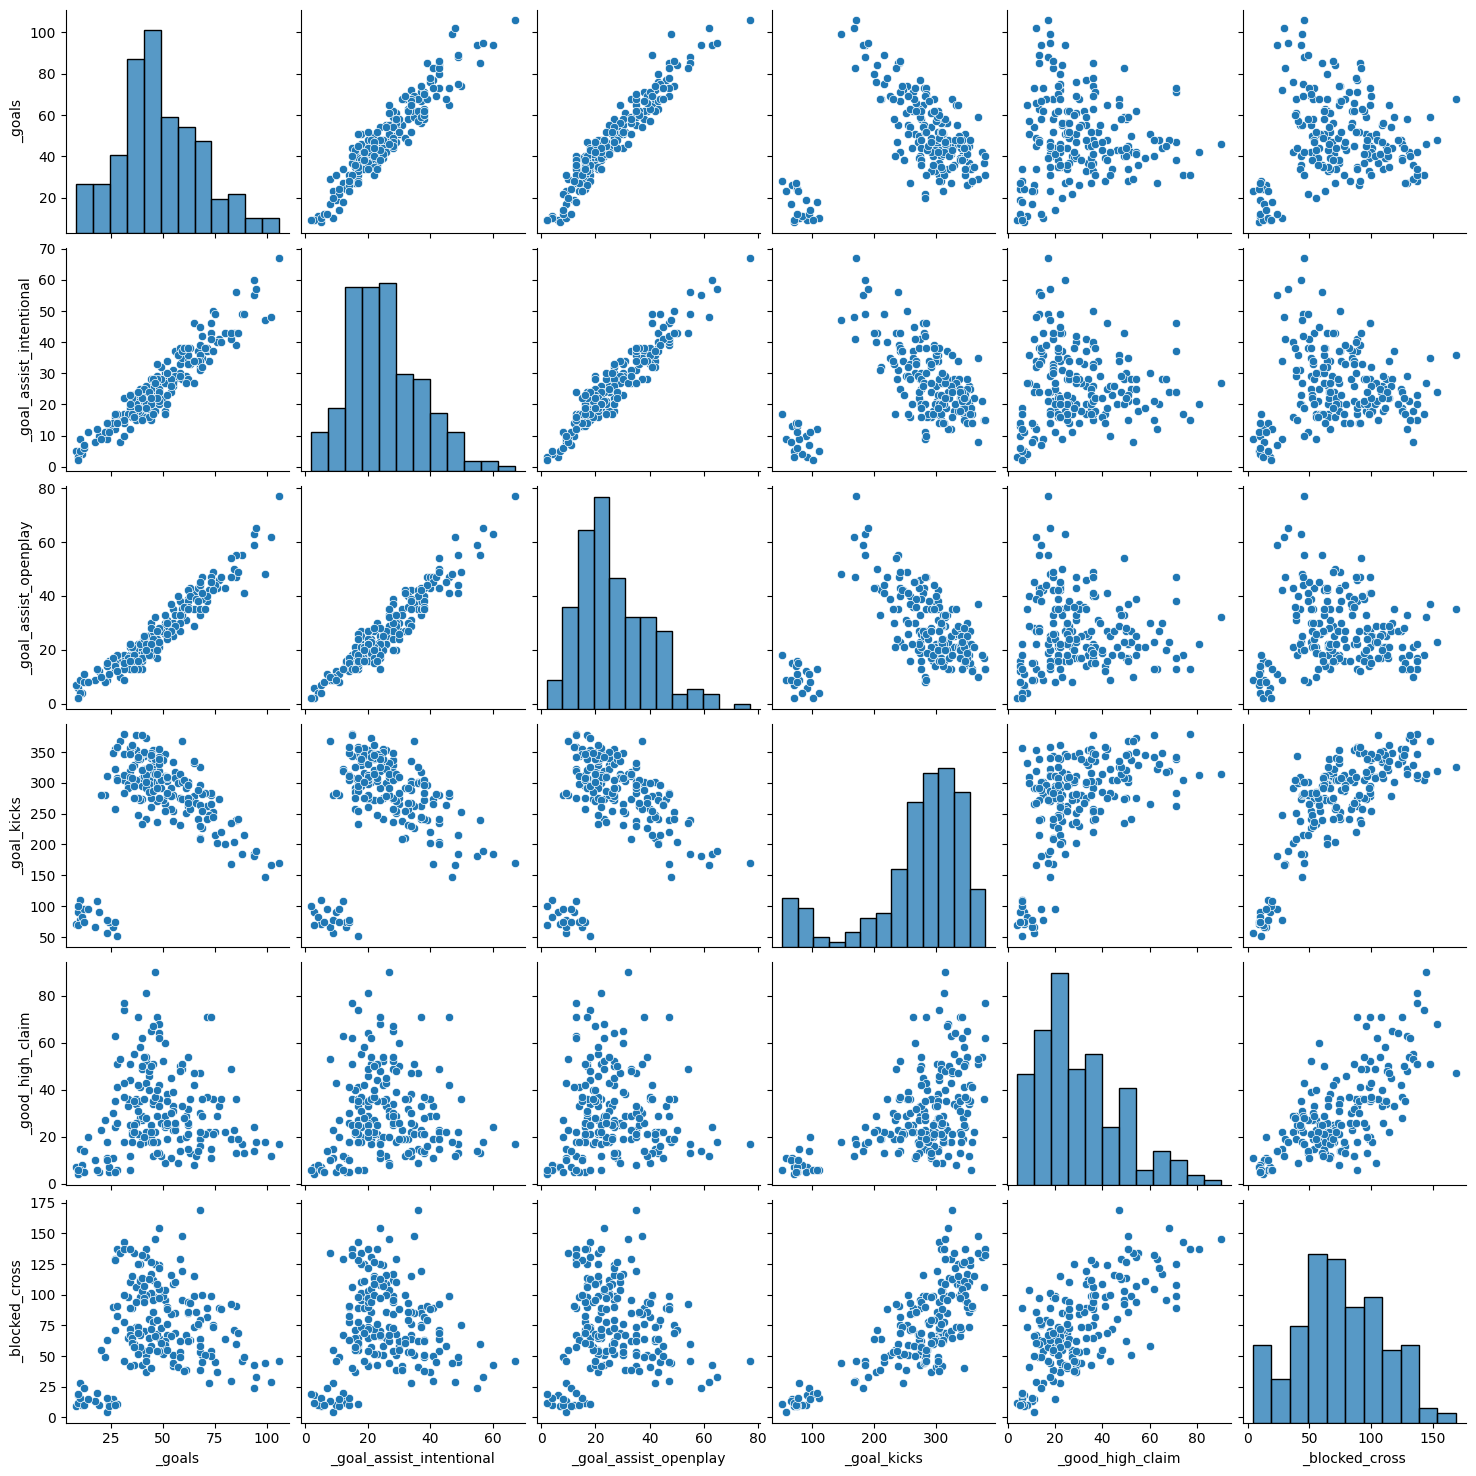

In [26]:
n = 5
tartet_id = 22 #_goals
for col in range(2, df_new.shape[1]-n, n):
    loc_ = [tartet_id] + list(range(col , col+n)) #Индексы колонок
    if tartet_id in list(range(col , col+n)):
        loc_.remove(tartet_id)
    sns.pairplot(df_new.iloc[:, loc_])

In [27]:
df.to_csv('eda_data/clubs_stat.csv', index=False)